<a href="https://colab.research.google.com/github/Shashankvenigalla/collab/blob/main/IEEE_Hate_Speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_twitter=pd.read_csv("train.csv")

In [ ]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<ipython-input-66-20a8d4819fba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_twitter, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='label', ylabel='count'>

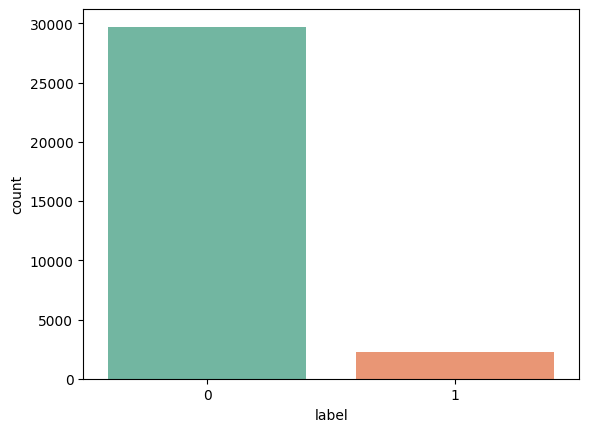

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df_twitter, palette='Set2')

In [ ]:
df_twitter.shape

(31962, 3)

In [ ]:
df_twitter.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
df_twitter.drop('id',axis=1,inplace=True)

In [ ]:
df_offensive=pd.read_csv("labeled_data.csv")

In [ ]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df_offensive.shape

(24783, 7)

In [ ]:
df_offensive.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [ ]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [ ]:
df_offensive.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [ ]:
df_offensive['class'].unique()

array([2, 1, 0])

<ipython-input-77-7c79060f6927>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_offensive, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 l

<Axes: xlabel='class', ylabel='count'>

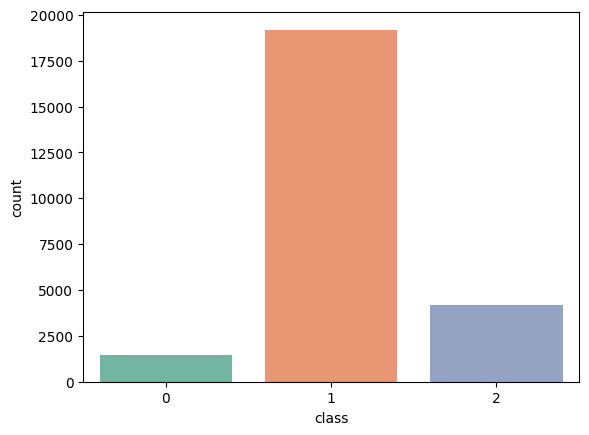

In [ ]:
import seaborn as sns
sns.countplot(x='class', data=df_offensive, palette='Set2')

In [ ]:
df_offensive[df_offensive['class']==0]['class']=1

<ipython-input-78-ecec8f69341f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offensive[df_offensive['class']==0]['class']=1


In [ ]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df_offensive['class'].unique()

array([2, 1, 0])

In [ ]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [ ]:
df_offensive["class"].replace({0: 1}, inplace=True)

<ipython-input-82-cb185b427be3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_offensive["class"].replace({0: 1}, inplace=True)


In [ ]:
df_offensive['class'].unique()

array([2, 1])

<ipython-input-84-7c79060f6927>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_offensive, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='class', ylabel='count'>

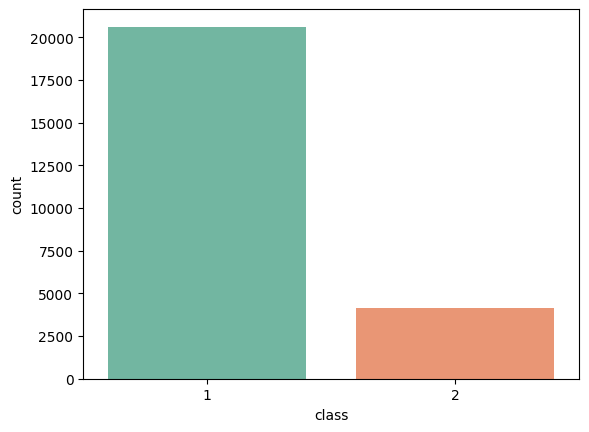

In [ ]:
import seaborn as sns
sns.countplot(x='class', data=df_offensive, palette='Set2')

In [ ]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [ ]:
df_offensive["class"].replace({2: 0}, inplace=True)

<ipython-input-86-cd5762eb62ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_offensive["class"].replace({2: 0}, inplace=True)


<ipython-input-87-1ae55aa30cc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=df_offensive, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='class', ylabel='count'>

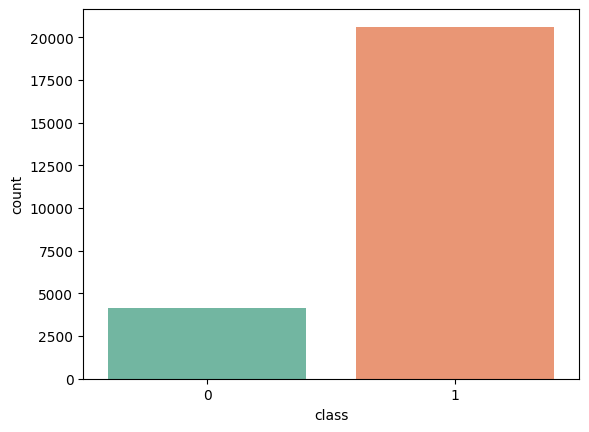

In [ ]:
import seaborn as sns
sns.countplot(x='class',data=df_offensive, palette='Set2')

In [ ]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [ ]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df_offensive.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [ ]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [ ]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<ipython-input-94-be7bfc7b0e39>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=df, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='label', ylabel='count'>

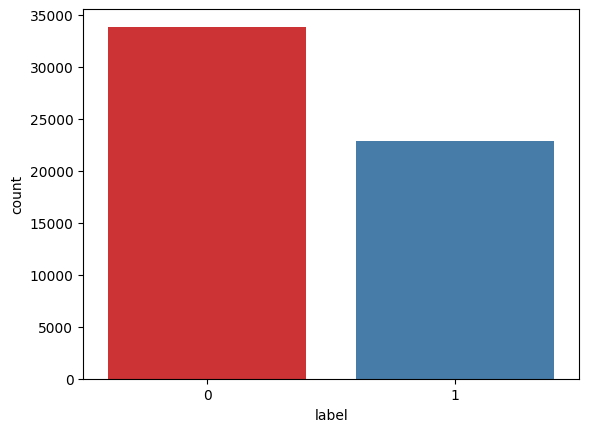

In [ ]:
sns.countplot(x='label',data=df, palette='Set1')

# Confusion Matrix of Models Used

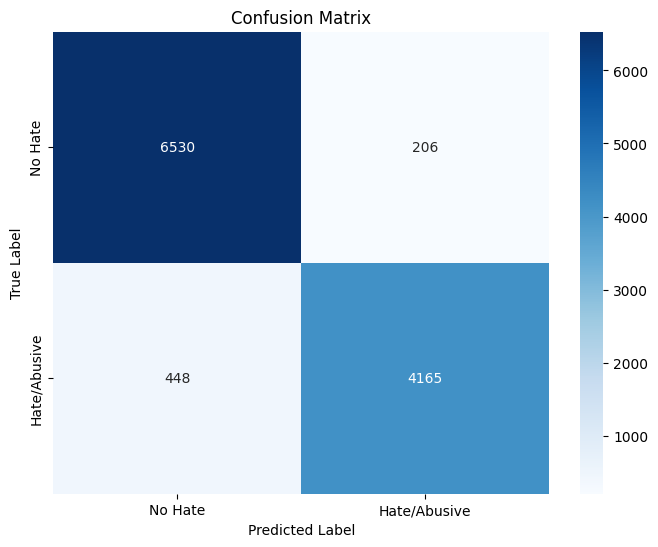

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, res2)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Hate', 'Hate/Abusive'],
            yticklabels=['No Hate', 'Hate/Abusive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['No Hate', 'Hate/Abusive'],
              yticklabels=['No Hate', 'Hate/Abusive'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(title)
  plt.show()

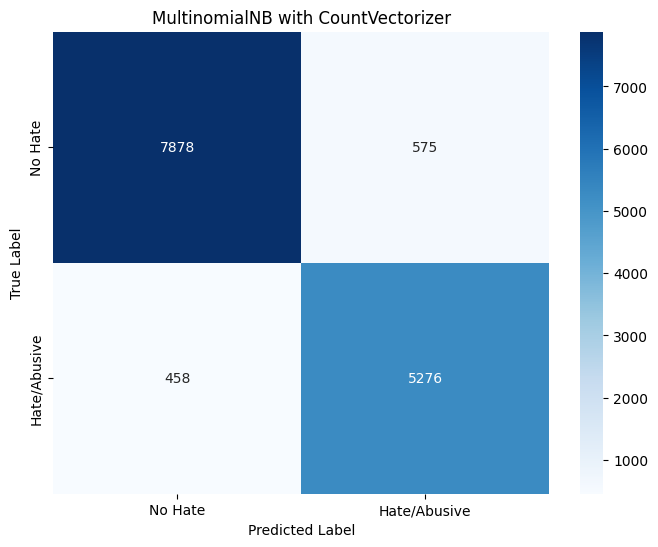

In [ ]:
# Confusion matrix for MultinomialNB with CountVectorizer
plot_confusion_matrix(y_test, prediction_vectorizer, 'MultinomialNB with CountVectorizer')

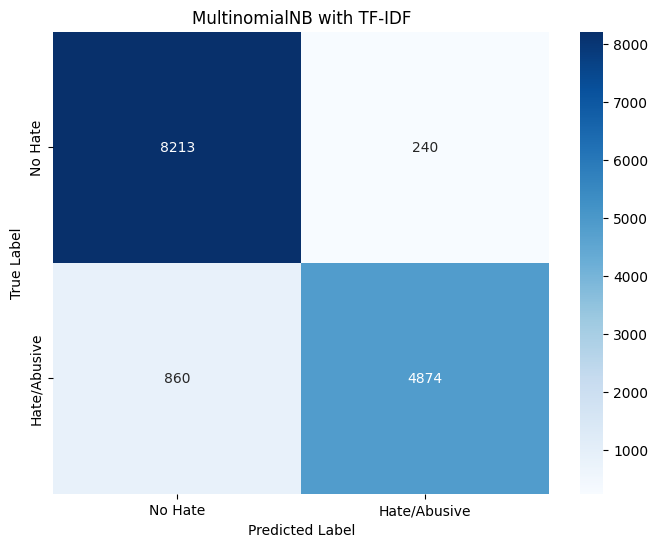

In [ ]:
# Confusion matrix for MultinomialNB with TF-IDF
plot_confusion_matrix(y_test, prediction_tfidf, 'MultinomialNB with TF-IDF')

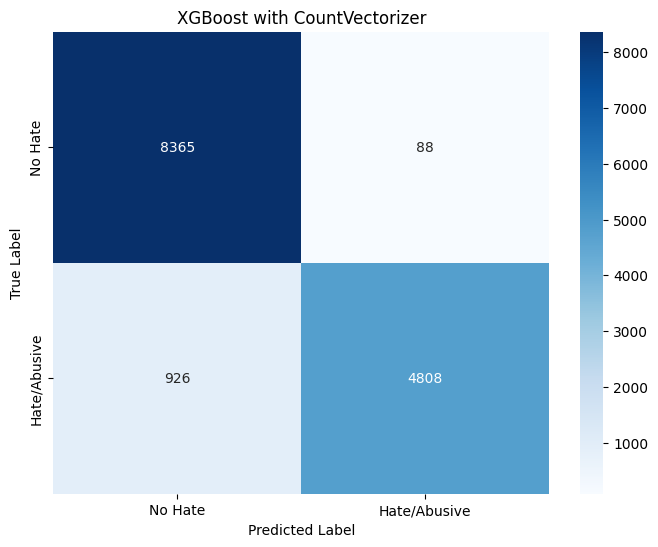

In [ ]:
# Confusion matrix for XGBoost with CountVectorizer
plot_confusion_matrix(y_test, xgb_predictions_vectorizer, 'XGBoost with CountVectorizer')

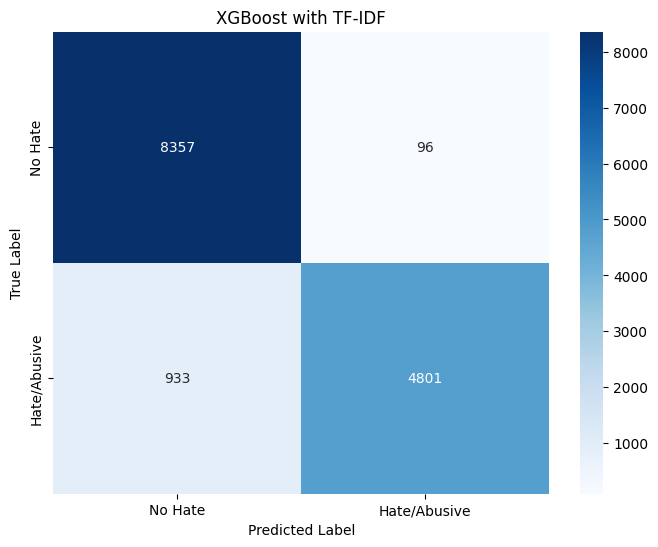

In [ ]:
# Confusion matrix for XGBoost with TF-IDF
plot_confusion_matrix(y_test, xgb_predictions, 'XGBoost with TF-IDF')

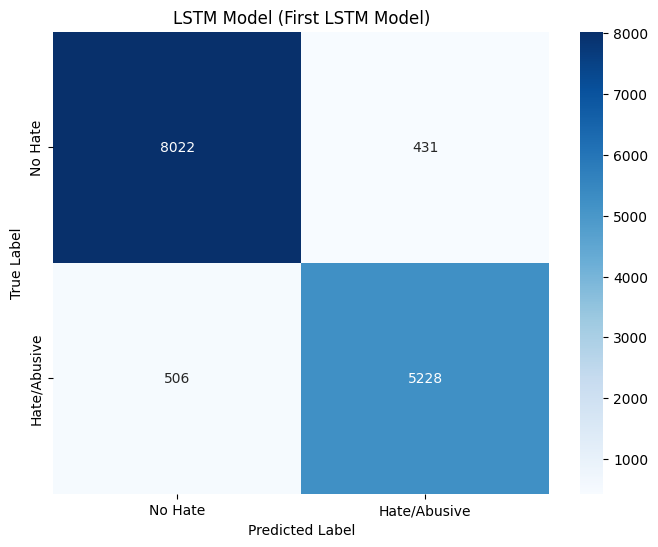

In [ ]:
# Confusion matrix for LSTM Model (First LSTM Model)
plot_confusion_matrix(y_test, res, 'LSTM Model (First LSTM Model)')

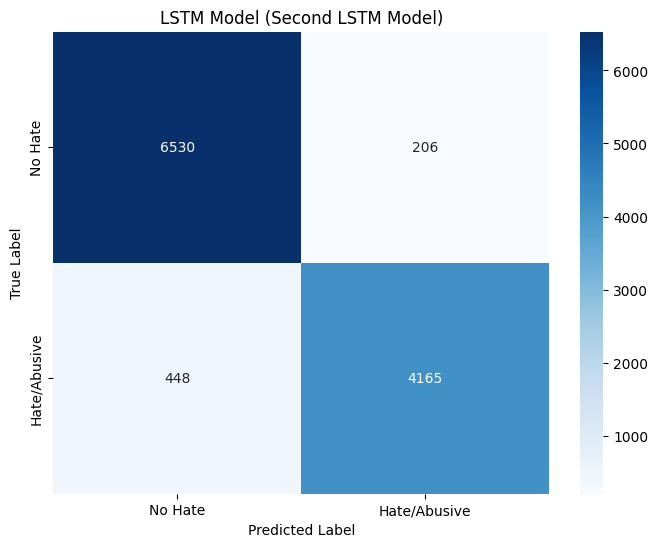

In [ ]:
# Confusion matrix for LSTM Model (Second LSTM Model)
plot_confusion_matrix(Y_test, res2, 'LSTM Model (Second LSTM Model)')

In [ ]:
df.shape

(56745, 2)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
df['tweet']=df['tweet'].apply(clean_text)

In [ ]:
df.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet:
        val = str(val).lower()


        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [ ]:
x=df['tweet']
y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [ ]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
count.vocabulary_

{'pictur': 496965,
 'galleri': 244789,
 'live': 386374,
 'blackcavali': 78353,
 'caucasian': 105699,
 'webcam': 750931,
 'pictur galleri': 497099,
 'galleri live': 244792,
 'live blackcavali': 386462,
 'blackcavali caucasian': 78354,
 'caucasian webcam': 105705,
 'pictur galleri live': 497100,
 'galleri live blackcavali': 244793,
 'live blackcavali caucasian': 386463,
 'blackcavali caucasian webcam': 78355,
 'pictur galleri live blackcavali': 497101,
 'galleri live blackcavali caucasian': 244794,
 'live blackcavali caucasian webcam': 386464,
 'pictur galleri live blackcavali caucasian': 497102,
 'galleri live blackcavali caucasian webcam': 244795,
 'shoutout': 600018,
 'everybodi': 198100,
 'follow': 226779,
 'nicca': 455780,
 'shoutout everybodi': 600045,
 'everybodi follow': 198226,
 'follow nicca': 227264,
 'shoutout everybodi follow': 600046,
 'everybodi follow nicca': 198227,
 'shoutout everybodi follow nicca': 600047,
 'user': 703467,
 'bet': 56640,
 'second': 586131,
 'goal': 25

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)
x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[7878  575]
 [ 458 5276]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [ ]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8453
           1       0.95      0.85      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.93      0.91      0.92     14187
weighted avg       0.92      0.92      0.92     14187

[[8213  240]
 [ 860 4874]]


In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [ ]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[8365   88]
 [ 926 4808]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.90      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [ ]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:33:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[8357   96]
 [ 933 4801]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.90      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow
!pip install keras

In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import EarlyStopping

In [ ]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Set a vocabulary size (based on the embedding layer's limit)
max_words = 5000  # Maximum number of words to keep, based on word frequency.
max_len = 100  # Maximum sequence length

# Tokenizer with a limit on the number of words (vocabulary)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

# Convert text sequences to matrix
sequences_matrix = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences_matrix, maxlen=max_len)

# Model definition
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))  # Ensure max_words matches your tokenizer limit
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

try:
    # Train the model
    model.fit(sequences_matrix, y_train, batch_size=128, epochs=10,
              validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

    # Prepare test data
    test_sequences = tokenizer.texts_to_sequences(x_test)
    test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

    # Evaluate model
    accr = model.evaluate(test_sequences_matrix, y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

except Exception as e:
    print(f"An error occurred: {e}")

Epoch 1/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 98s 349ms/step - accuracy: 0.8314 - loss: 0.3549 - val_accuracy: 0.9461 - val_loss: 0.1517
Epoch 2/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 88s 333ms/step - accuracy: 0.9545 - loss: 0.1302 - val_accuracy: 0.9470 - val_loss: 0.1505
Epoch 3/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 135s 308ms/step - accuracy: 0.9642 - loss: 0.1053 - val_accuracy: 0.9457 - val_loss: 0.1587
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9377 - loss: 0.1805
Test set
  Loss: 0.177
  Accuracy: 0.938


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define parameters
max_words = 50000  # Adjust this based on your vocabulary size
max_len = 300  # Input length of each sample

def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

# Create the model
model = RNN()
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Define callbacks
stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5
)

checkpoint = ModelCheckpoint(
    filepath='model.weights.h5',  # Specify a valid filepath ending with .weights.h5
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 300, 50)             │       2,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out_layer (Dense)                    │ (None, 1)                   │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,546,337 (9.71 MB)

 Trainable params: 2,546,337 (9.71 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5
)
checkpoint = ModelCheckpoint(
    filepath='model.weights.h5',  # Specify a valid filepath ending with .weights.h5
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Make sure to set the correct max_len for sequences
max_len = 100  # Adjust this if you want longer sequences

# Adjust the tokenizer and sequence padding
sequences_matrix = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences_matrix, maxlen=max_len)

# Correct the model's Embedding layer input_length to match max_len
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))  # input_length=max_len (100)
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
try:
    history = model.fit(sequences_matrix, y_train, batch_size=1024, epochs=10,
                        validation_split=0.2, callbacks=[stop, checkpoint])
except Exception as e:
    print(f"An error occurred: {e}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6320 - loss: 0.6544 - val_accuracy: 0.7971 - val_loss: 0.4832
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8263 - loss: 0.4252 - val_accuracy: 0.8828 - val_loss: 0.3386
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8927 - loss: 0.3088 - val_accuracy: 0.9051 - val_loss: 0.2612
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9178 - loss: 0.2335 - val_accuracy: 0.9279 - val_loss: 0.2014
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9377 - loss: 0.1740 - val_accuracy: 0.9332 - val_loss: 0.1765
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9518 - loss: 0.1367 - val_accuracy: 0.9388 - val_loss: 0.1644
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9563 - loss: 0.1213 - val_accuracy: 0.9413 - val_loss: 0.1620
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9607 - loss: 0.1118 - val_accuracy: 0.9426 - val_loss: 0.1622
Epo

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.9342 - loss: 0.1942


In [ ]:
lstm_prediction=model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step


In [ ]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [ ]:
print(confusion_matrix(y_test,res))

[[8022  431]
 [ 506 5228]]


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save("hate&abusive_model.h5")

In [ ]:
import keras
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [ ]:
test = 'I hate my country'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

I hate my country
i hate my country
['hate countri']
[[61, 408]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
pred [[0.5810097]]
hate and abusive


In [ ]:
frame=[df_twitter,df_offensive]
df2 = pd.concat(frame)

In [ ]:
df2.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
df2['tweet'] = df2['tweet'].apply(clean_text)

In [ ]:
df2.head(5)

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks #lyft credit cant use cause d...
2,0,bihday majesty
3,0,#model love u take u time ur
4,0,factsguide society #motivation


In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer2 = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer2.fit_on_texts(df2['tweet'].values)
word_index = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index))

Found 67728 unique tokens.


In [ ]:
X = tokenizer2.texts_to_sequences(df2['tweet'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (56745, 250)


In [ ]:
Y=df['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(45396, 250) (45396,)
(11349, 250) (11349,)


In [ ]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
epochs = 10
batch_size = 1024
history2 = model2.fit(X_train, Y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 178s 5s/step - accuracy: 0.6024 - loss: 0.6561 - val_accuracy: 0.7121 - val_loss: 0.6562
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.8600 - loss: 0.4029 - val_accuracy: 0.9032 - val_loss: 0.2697
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.9120 - loss: 0.2445 - val_accuracy: 0.9263 - val_loss: 0.2038
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.9326 - loss: 0.1893 - val_accuracy: 0.9392 - val_loss: 0.1758
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.9428 - loss: 0.1621 - val_accuracy: 0.9423 - val_loss: 0.1644


In [ ]:
# test_sequences2 = tokenizer2.texts_to_sequences(X_test)
# test_sequences_matrix2 = sequence.pad_sequences(test_sequences2,maxlen=MAX_SEQUENCE_LENGTH)
accr = model2.evaluate(X_test,Y_test)

355/355 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.9418 - loss: 0.1670


In [ ]:
lstm_prediction2=model2.predict(X_test)
print(lstm_prediction2[0:5])
res2=[]
for prediction in lstm_prediction2:
    if prediction[0]<0.45:
        res2.append(0)
    else:
        res2.append(1)

355/355 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step
[[0.9979874 ]
 [0.3693885 ]
 [0.83038783]
 [0.9992023 ]
 [0.00894302]]


In [ ]:
Y_test[0:5]

,label
12238,1
14377,0
17207,1
22168,1
18801,0


In [ ]:
print(confusion_matrix(Y_test,res2))

[[6530  206]
 [ 448 4165]]


In [ ]:
test = 'I love this country'
def clean_text(text):

    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
test=[clean_text(test)]
print(test)
seq = tokenizer2.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=250)
print(seq)
pred = model2.predict(padded)
print("pred", pred)
if pred<0.45:
    print("no hate")
else:
    print("hate and abusive")

['love country']
[[5, 485]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
pred [[0.04088458]]
no hate


In [ ]:
test = 'I hate this country'
def clean_text(text):

    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
test=[clean_text(test)]
print(test)
seq = tokenizer2.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=250)
print(seq)
pred = model2.predict(padded)
print("pred", pred)
if pred<0.45:
    print("no hate")
else:
    print("hate and abusive")

['hate country']
[[71, 485]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
pred [[0.3116629]]
no hate
